In [30]:
from hikyuu.interactive import *
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def TurtleSG(self, k):
     n1 = self.get_param("n1")
     n2 = self.get_param("n2")
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     print(h)
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._add_buy_signal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._add_sell_signal(k[i].datetime)

In [35]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash = 100000)

my_mm = MM_Nothing()
my_mm = MM_FixedCount(1000)


my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')
#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA作为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(EMA(C, n=5), slow_n=10)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)

sys.run(sm['sz000001'], Query(-150))


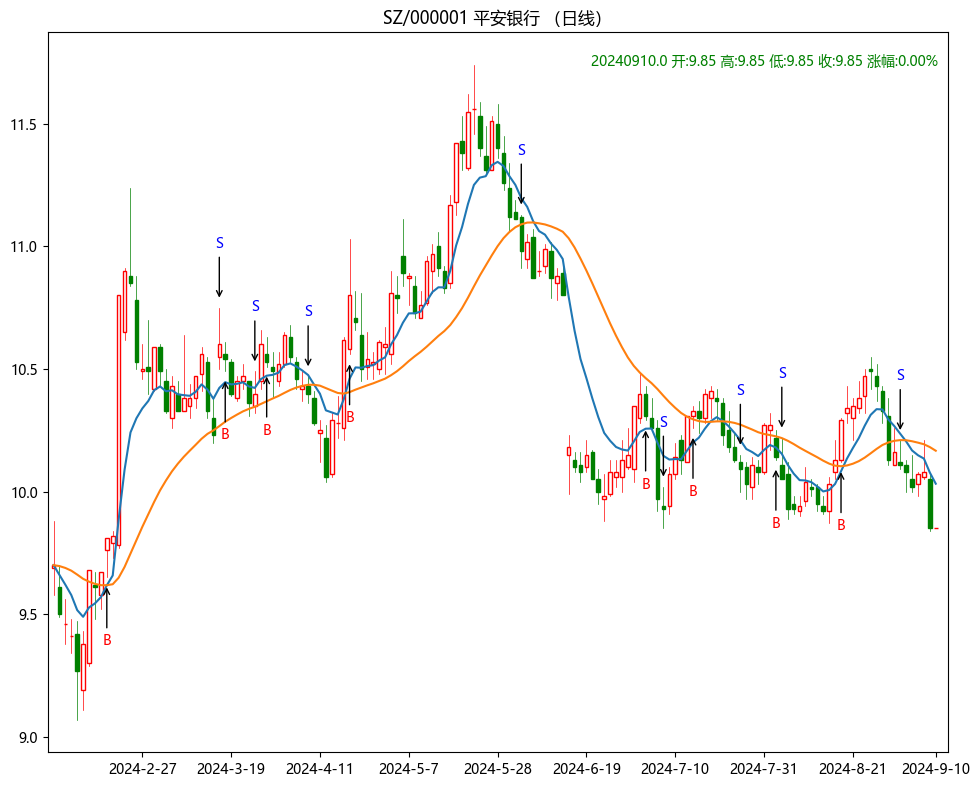

In [36]:
#绘制系统信号
sys.plot()

k = sm['sz000001'].get_kdata(Query(-150))
c = CLOSE(k)
fast = SMA(c, 10)
slow = SMA(fast, 20)

#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)

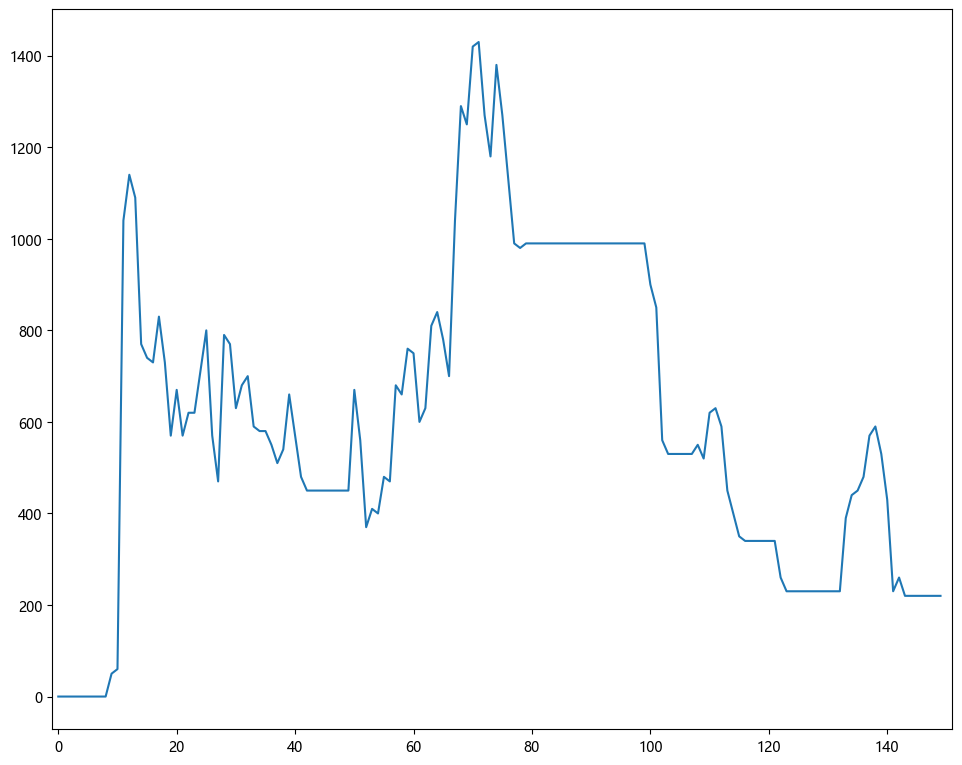

In [37]:
#绘制资金收益曲线
x = my_tm.get_profit_curve(k.get_datetime_list(), Query.DAY)
x = PRICELIST(x)
x.plot()

In [29]:
#回测统计
per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))

帐户初始金额: 100000.00
累计投入本金: 100000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 100220.00
未平仓头寸净值: 0.00
当前总资产: 100220.00
已平仓交易总成本: 0.00
已平仓净利润总额: 220.00
单笔交易最大占用现金比例%: 10.53
交易平均占用现金比例%: 10.26
已平仓帐户收益率%: 0.22
帐户年复合收益率%: 0.39
帐户平均年收益率%: 0.39
赢利交易赢利总额: 1330.00
亏损交易亏损总额: -1110.00
已平仓交易总数: 8.00
赢利交易数: 2.00
亏损交易数: 6.00
赢利交易比例%: 25.00
赢利期望值: 27.50
赢利交易平均赢利: 665.00
亏损交易平均亏损: -185.00
平均赢利/平均亏损比例: 3.59
净赢利/亏损比例: 1.20
最大单笔赢利: 790.00
最大单笔盈利百分比%: 8.09
最大单笔亏损: -460.00
最大单笔亏损百分比%: -4.42
赢利交易平均持仓时间: 35.50
赢利交易最大持仓时间: 46.00
亏损交易平均持仓时间: 8.67
亏损交易最大持仓时间: 14.00
空仓总时间: 83.00
空仓时间/总时间%: 40.00
平均空仓时间: 10.00
最长空仓时间: 29.00
最大连续赢利笔数: 1.00
最大连续亏损笔数: 4.00
最大连续赢利金额: 790.00
最大连续亏损金额: -770.00
R乘数期望值: 0.00
交易机会频率/年: 14.24
年度期望R乘数: 0.00
赢利交易平均R乘数: 0.06
亏损交易平均R乘数: -0.02
最大单笔赢利R乘数: 0.08
最大单笔亏损R乘数: -0.04
最大连续赢利R乘数: 0.08
最大连续亏损R乘数: -0.02

